<a href="https://colab.research.google.com/github/bnandan/IoTnML_impl/blob/master/k_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Score for number of cluster(s) 2: -28.37335881028821
Silhouette score for number of cluster(s) 2: 0.554028188086404
Davies Bouldin score for number of cluster(s) 2: 0.8108350134033874
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------
Score for number of cluster(s) 3: -13.300976748774918
Silhouette score for number of cluster(s) 3: 0.6616763055508986
Davies Bouldin score for number of cluster(s) 3: 0.5214336042622895
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------
Score for number of cluster(s) 4: -4.503651454175542
Silhouette score for number of cluster(s) 4: 0.7353244229896032
Davies Bouldin score for number of cluster(s) 4: 0.36626577159262635
V-measure score for number of cluster(s) 4: 0.905746099275519
----------------------------------------------------------------------
Score for number of cluster(s) 5: -3.000238

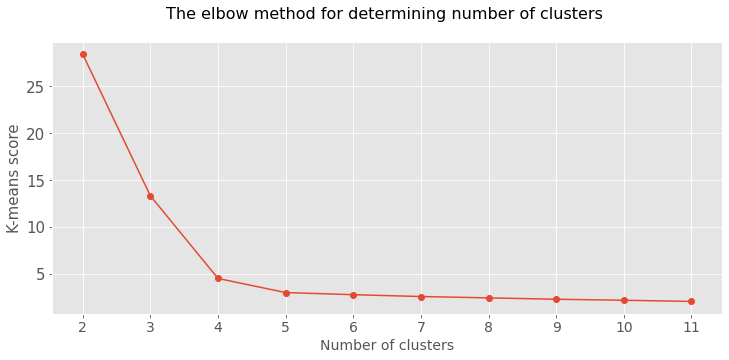

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

data = make_blobs(n_samples = n_samples, n_features=n_features, centers=n_cluster, cluster_std=cluster_std)
data[0].shape
#(200, 4)

scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(data[0])
y = data[1]

km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []

for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i, km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled, preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i, silhouette))
    
    db = davies_bouldin_score(X_scaled, preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i, db))
    
    v_measure = v_measure_score(y, preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i, v_measure))
    print("-"*70)
plt.figure(figsize=(12, 5))
plt.title("The elbow method for determining number of clusters \n", fontsize=16)
plt.plot([i for i in range(2,12)], km_scores, marker = 'o')
plt.grid(True)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("K-means score", fontsize=15)
plt.xticks([i for i in range(2, 12)], fontsize=14)
plt.yticks(fontsize=15)
plt.savefig('the_elbow_method.png')
plt.show()